<div dir=rtl><h1>
&emsp;
&emsp;
&emsp;
&emsp;
&emsp;
<b>
פרוייקט חלק 3
</b>
</h1>

<h4>
שמות: אריאל נובומינסקי, אילי ששון
</br>
ת.ז. : 322228974, 322995358
</h4>


</div>

<div dir=rtl>
<h4>
<br>
<br>

נטען את סט הנתונים ונבצע את הטרנספורמציות שביצענו בחלק הראשון:
</h4>


</div>

In [1]:
import datetime
import statsmodels.api as sm
import scipy.stats as dist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, scipy.stats as st
import math
import matplotlib.patches as mpatches
from tabulate import tabulate
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from scipy.linalg import fractional_matrix_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/googleplaystore.csv")
df = df.drop(df[(df.Type !='Paid') & (df.Type !='Free')].index)
df = df.dropna()
isFree_Data = df.Type.apply(lambda x: True if x=='Free' else False)
df.insert(7,'IsFree',isFree_Data)
df = df.drop('Type', 1)
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
Last_Updated=pd.to_datetime(df['Last Updated'], format='%B %d %Y')
df = df.drop('Last Updated',axis=1)
df.insert(9,'Last Updated',Last_Updated)
recntly = df['Last Updated'].map(lambda x: True if x > datetime.date(2018,6,1) else False)
df.insert(9,'Recntly Updated',recntly)
df['Installs'] = df['Installs'].map(lambda s: int(s[:-1].replace(',', '')))
df['Reviews'] = df['Reviews'].map(lambda s: int(s))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  # This is added back by InteractiveShellApp.init_path()


,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Recntly Updated,Last Updated,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,True,0,Everyone,False,2018-01-07,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,True,0,Everyone,False,2018-01-15,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,True,0,Everyone,True,2018-08-01,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,True,0,Teen,True,2018-06-08,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,True,0,Everyone,True,2018-06-20,Art & Design;Creativity,1.1,4.4 and up


<div dir=rtl>
<h3>
<b>חלק א' - ריגרסיה לינארית</b>
</h3>
</div>

<div dir=rtl>
<h4>
1. המשתנים המסבירים שלנו יהיו Rating, Reviews, ו -  Content Rating.
</br>
המשתנה המוסבר יהיה Installs.
</br>
שאלת המחקר שלנו כיצד משפיעים דירוג האפליקציה, מספר הביקורות שיש לה, ודירוג התוכן שלה, על מספר ההורדות שלה.
</br>
אנו משערים כי אפליקציות בעלות דירוג גבוה יותר תורד יותר פעמים וכי גם מספר רב יותר של ביקורות יגרור מספר הורדות גבוה יותר. בנוסף, אנו משערים כי דירוג תוכן המתאים לקהל רחב יותר יגרום למספר הורדות גבוה יותר.
</br>
</br>
על מנת שיהיה לנו יותר קל לנתח את הנתונים להריץ רגרסיה עליהם נבצע מספר טרנספורמציות על הנתונים:  
</h4>
</div>

In [3]:
ln_reg_df = df[['Rating', 'Reviews', 'Content Rating', 'Installs']]
ln_reg_df.head()

,Rating,Reviews,Content Rating,Installs
0,4.1,159,Everyone,10000
1,3.9,967,Everyone,500000
2,4.7,87510,Everyone,5000000
3,4.5,215644,Teen,50000000
4,4.3,967,Everyone,100000


<div dir=rtl>
<h4>
Content Rating:
</h4>
</div>

<div dir=rtl>
<h4>
הערכים במשתנה זה הם מחרוזות ולא ניתן לייצג אותם כערך מספרי ולכן לכל קטגורית דירוג תוכן ניצור עמודה בטבלה שתיהיה 1 אם הרשומה הגיעה מקטגוריה זו או 0 אחרת:</h4>
</div>

In [4]:
con_rat_vals = ln_reg_df['Content Rating'].unique()

for v in con_rat_vals:
  ln_reg_df[v] = np.where(ln_reg_df['Content Rating'] == v, 1, 0)

ln_reg_df.head()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Rating,Reviews,Content Rating,Installs,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
0,4.1,159,Everyone,10000,1,0,0,0,0,0
1,3.9,967,Everyone,500000,1,0,0,0,0,0
2,4.7,87510,Everyone,5000000,1,0,0,0,0,0
3,4.5,215644,Teen,50000000,0,1,0,0,0,0
4,4.3,967,Everyone,100000,1,0,0,0,0,0


<div dir=rtl>
<h4>
Installs:
</h4>
</div>

<div dir=rtl>
<h4>
הערכים במשתנה זה הם בכפולות של 5 (5 הורדות, 100 הורדות, 10000 הורדות וכ'). עובדה זו גורמת לטווח הערכים במשתנה זה להיות מאוד דליל, למשל המרחק בין הערך השביעי (1000) לערך השמיני (5000) הוא הרבה יותר גדול מהמרחק בין הערך הערך הראשון (1) לערך השני (5). על מנת להדגים את הבעיה שנוצרת מהעובדה הנ"ל נציג היסטוגרמה של הערכים במשתנה:
</h4>
</div>

Histogram Of Installs Values:


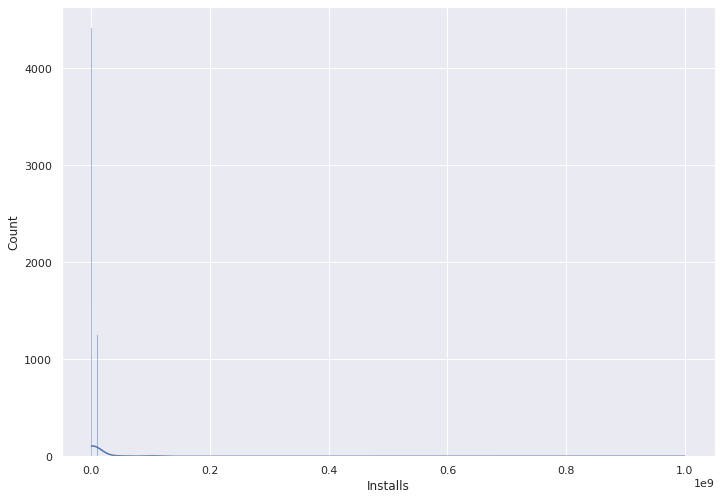

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
print('Histogram Of Installs Values:')
sns.histplot(ln_reg_df['Installs'], kde = True)
plt.show()


<div dir=rtl>
<h4>
ניתן לראות כי ההיסטוגרמה <b>כלל לא</b> אינפורמטיבית.
</br>
על מנת להתמודד עם בעיה זו, נפעיל את פונקציה הלוג - 10 על הנתונים וכך נקבל תווך ערכים פחות דליל.
</h4>
</div>

In [6]:
ln_reg_df['Installs'] = ln_reg_df['Installs'].map(lambda x: np.log10(x))
ln_reg_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rating,Reviews,Content Rating,Installs,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
0,4.1,159,Everyone,4.00000,1,0,0,0,0,0
1,3.9,967,Everyone,5.69897,1,0,0,0,0,0
2,4.7,87510,Everyone,6.69897,1,0,0,0,0,0
3,4.5,215644,Teen,7.69897,0,1,0,0,0,0
4,4.3,967,Everyone,5.00000,1,0,0,0,0,0


<div dir=rtl>
<h4>
Reviews:
</br>
 נשים לב לטווח הערכים במשתנה זה:
</h4>
</div>

In [7]:
print('Range Of Values: [', min(ln_reg_df['Reviews'].unique()), ', ', max(ln_reg_df['Reviews'].unique()), ']')

Range Of Values: [ 1 ,  78158306 ]


<div dir=rtl>
<h4>
טווח הערכים נע בין 1 לבערך 80 מיליון. מסיבה זו, גם במשתנה זה יהיה מאוד קשה לעבוד עם ערכים אלו. נבצע טרנספורמצית לוג - 10 גם כאן:
</h4>
</div>

In [8]:
ln_reg_df['Reviews'] = ln_reg_df['Reviews'].map(lambda x: np.log10(x))
ln_reg_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rating,Reviews,Content Rating,Installs,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
0,4.1,2.201397,Everyone,4.00000,1,0,0,0,0,0
1,3.9,2.985426,Everyone,5.69897,1,0,0,0,0,0
2,4.7,4.942058,Everyone,6.69897,1,0,0,0,0,0
3,4.5,5.333737,Teen,7.69897,0,1,0,0,0,0
4,4.3,2.985426,Everyone,5.00000,1,0,0,0,0,0


<div dir=rtl>
<h4>
2. נבחר תת מדגם אקראי:
</h4>
</div>

In [9]:
sub_set = ln_reg_df.sample(200, random_state=18)
sub_set.head()

,Rating,Reviews,Content Rating,Installs,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
7499,4.1,1.785330,Everyone,3.00000,1,0,0,0,0,0
3588,3.7,3.696880,Everyone,6.00000,1,0,0,0,0,0
4030,4.2,1.301030,Everyone,3.69897,1,0,0,0,0,0
4719,4.2,1.462398,Everyone,3.69897,1,0,0,0,0,0
289,4.2,4.667500,Everyone,6.00000,1,0,0,0,0,0


<div dir=rtl>
<h4>
3. ניתוח והצגה של הנתונים:
</h4>
</div>

<div dir=rtl>
<h4>
Installs:
</br>
נסתכל על היסטוגרמה של המשתנה:
</h4>
</div>

Histogram Of Installs: 


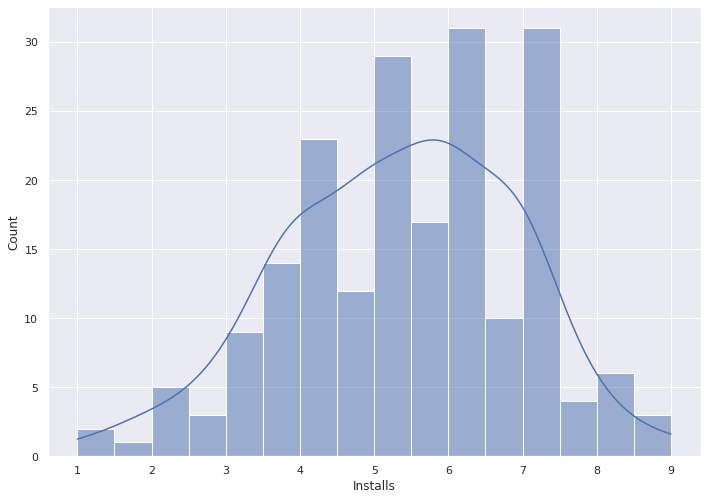

In [10]:
vals = sub_set['Installs']
sns.set(rc={'figure.figsize':(11.7,8.27)})

print('Histogram Of Installs: ')
sns.histplot(vals,binwidth=0.5, kde = True)
plt.show()

<div dir=rtl>
<h4>
נשים לב כי גרף המגמה מרמז על התפלגות נורמלית אך יש הרבה ערכים המקבלים "משקל" נמוך ממה שהם אמורים לקבל בהתפלגות נורמלית אמיתית. ערכים אלו הם הערכים שאינם שלמים, כלומר הערכים שבסט הנתונים המקורי אינם כפולות של 10 (10 בחזקת k).
</br>
הבעיה הזו כנראה נובעת מהאופן שבו נאספו הנתונים. הנתונים המוצגים הם עיגול של מספר ההורדות האמיתי ולכן כנראה שהעיגול נעשה בצורה כזו שרוב המספרים התעגלו לכפולות שלמות של 10 ולא לכפולות שלמות של 5.
</h4>
</div>

<div dir=rtl>
<h4>
Reviews:
</br>
נסתכל על היסטוגרמה של הנתונים:
</h4>
</div>

Histogram Of Rting: 


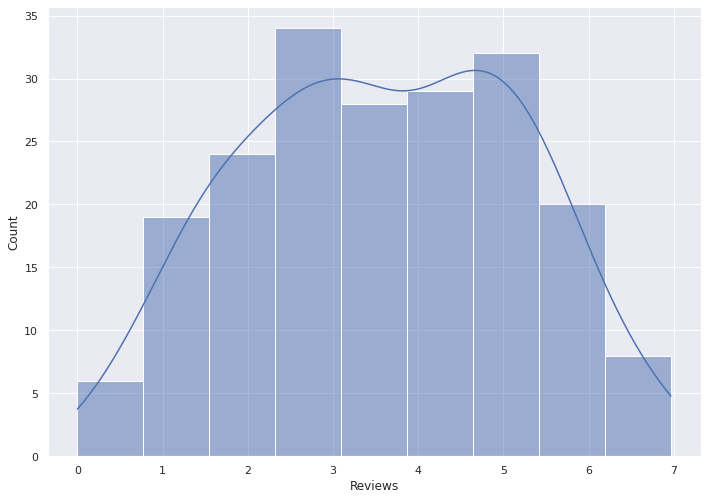

In [11]:
vals = sub_set['Reviews']
sns.set(rc={'figure.figsize':(11.7,8.27)})

print('Histogram Of Rting: ')
sns.histplot(vals, kde = True)
plt.show()

<div dir=rtl>
<h4>
ההיסטוגרמה מרמזת על התפלגות נורמלית סימטרית.
</h4>
</div>

<div dir=rtl>
<h4>
נסתכל על הקשר בין המשתנה המסביר Reviews למשתנה המוסבר Installs:
</h4>
</div>

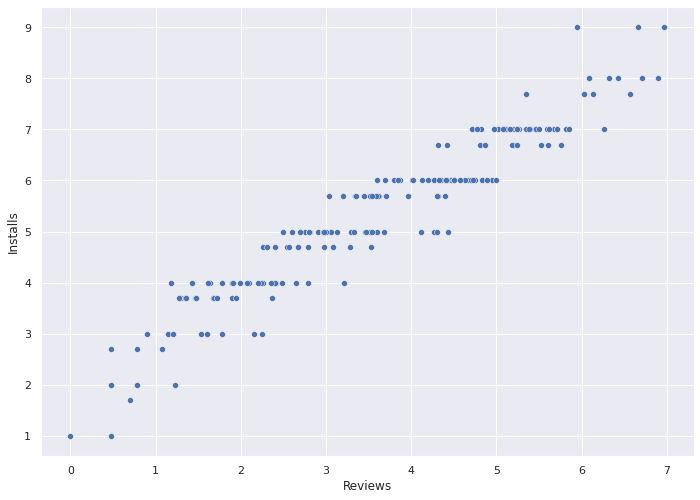

In [12]:
sns.scatterplot(data=sub_set[['Reviews', 'Installs']], x = 'Reviews', y = 'Installs')
plt.show()

<div dir=rtl>
<h4>
מהתרשים נסיק כי השערתינו מוצדקת ואכן יש יחס (לינארי) ישר בין כמות התגובות לכמות ההורדות.
</h4>
</div>

<div dir=rtl>
<h4>
Rating:
</br>
נסתכל על היסטוגרמה של המשתנה:
</h4>
</div>

Histogram Of Rting: 


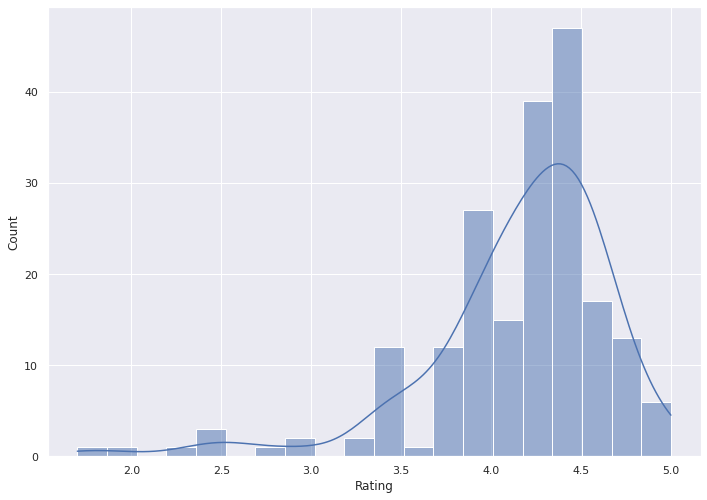

In [13]:
vals = sub_set['Rating']
sns.set(rc={'figure.figsize':(11.7,8.27)})

print('Histogram Of Rting: ')
sns.histplot(vals, kde = True)
plt.show()

<div dir=rtl>
<h4>
הנתונים מזכירים התפלגות נורמלית עם זנב שמאלי כבד אך נראה כי יש מעט ערכים חריגים (outlyers) "המושכים" את ההתפלגות שמאלה.
</br>
ניתן לראות עובדה זו גם בגרך ה - boxplot הבא:
</h4>
</div>

Box Plot Of Rting: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


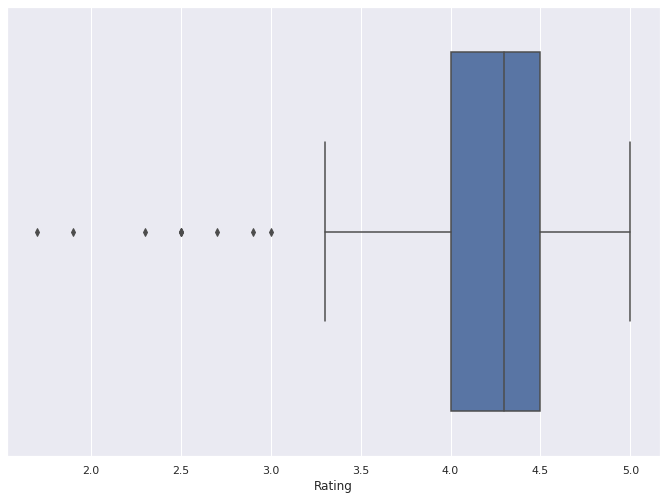

In [14]:
print('Box Plot Of Rting: ')
sns.boxplot(vals)
plt.show()

<div dir=rtl>
<h4>
נסתכל על היסטוגרמת המשתנה וגרף ה - boxplot שלו ללא הערכים החריגים:
</h4>
</div>

Histogram Of Rting: 


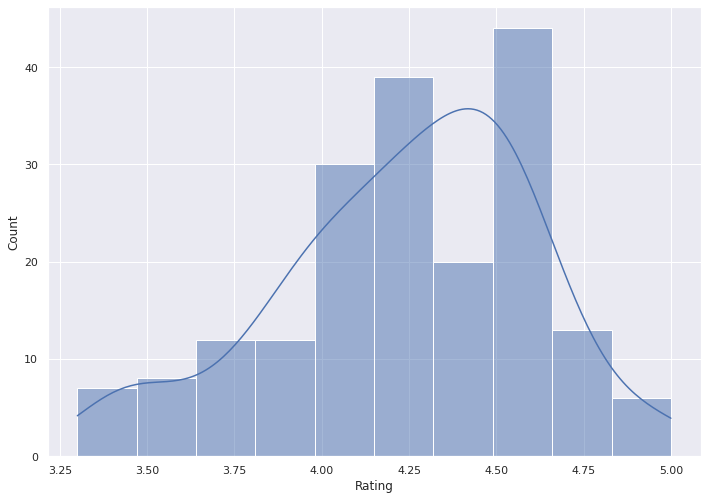

In [15]:
vals = sub_set[sub_set['Rating'] > 3]['Rating']
print('Histogram Of Rting: ')
sns.histplot(vals, kde = True)
plt.show()

Box Plot Of Rting: 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


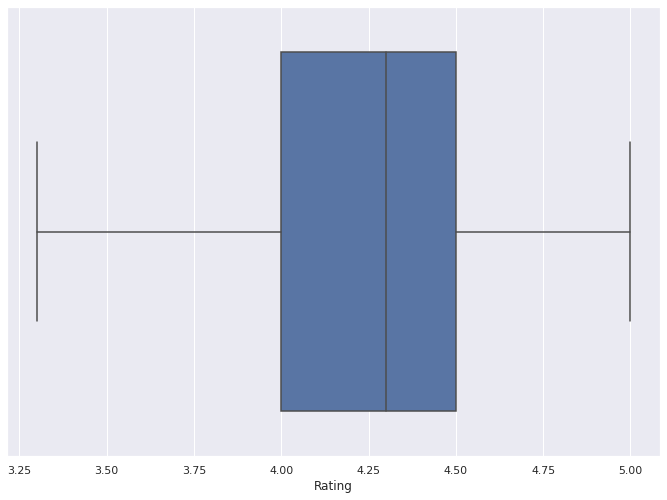

In [16]:
print('Box Plot Of Rting: ')
sns.boxplot(vals)
plt.show()

<div dir=rtl>
<h4>
כאשר מתעלמים מהערכים החריגים קיבלנו כי הנתונים אכן נראים כמתפלגים נורמלית.
</br>
הערכים החריגים הם ערכים הקטנים שווים ל - 3. המשמעות היא שה"מסה" הגדולה של האפליקציות מקבלות דירוגים הגדולים מ - 3.
</h4>
</div>

<div dir=rtl>
<h4>
נסתכל על הקשר בין המשתנה המסביר Rating למשתנה המוסבר Installs:
</h4>
</div>

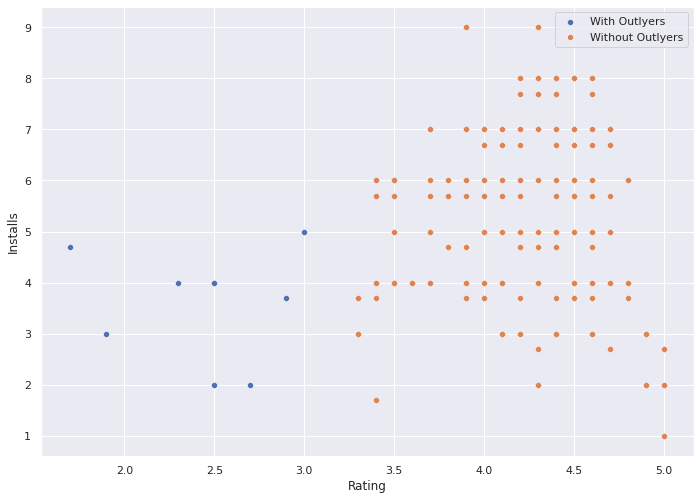

In [17]:
sns.scatterplot(data=sub_set[['Rating', 'Installs']], x = 'Rating', y = 'Installs', label='With Outlyers')

plot_df = sub_set[['Rating', 'Installs']]
plot_df = plot_df.drop(plot_df[(plot_df.Rating <= 3)].index)
sns.scatterplot(data=plot_df, x = 'Rating', y = 'Installs', label='Without Outlyers')
plt.legend()
plt.show()

<div dir=rtl>
<h4>
ניתן לראות כי משתקפת תמונה שונה מהשערתינו ההתחלתית לגבי השפעת ה - Rating על ה - Installs. ראשית נשים לב כי עבור ערכים הקטנים מ - 3 (שאותם הגדרנו כ -Outlyers) הגרף לא אינפורמטיבי (כנראה מכיוון שאין מספיק נתונים). עבור שאר הערכים נראה כי אין קשר כלל בין דירוג האפליקציה למספר ההורדות.
</h4>
</div>

<div dir=rtl>
<h4>
Content Rating:
</br>
נסתכל על טבלה של המשתנה:
</h4>
</div>

In [18]:
con_rat_vals = ln_reg_df['Content Rating'].unique()

sum_list = ['Total']
for c in con_rat_vals:
 sum_list.append(sub_set[c].sum())

per_list = ['Percentage']
per_list += [str((x/len(sub_set))*100) + '%' for x in sum_list[1:]] 

print(tabulate([sum_list, per_list], headers=[' '] + con_rat_vals))


             Everyone     Teen     Everyone 10+     Mature 17+     Adults only 18+     Unrated
----------  -----------  -------  ---------------  -------------  ------------------  ----------
Total       168          15       4                13             0                   0
Percentage  84.0%        7.5%     2.0%             6.5%           0.0%                0.0%


<div dir=rtl>
<h4>
ניתן לראות כי הרוב הגדול של האפליקציות הם בעלות דירוג תוכן של Everyone עם 84 אחוז מהאפליקציות. בנוסף, עקב האחוז הקטן של אפליקציות בעלות דירוג תוכן Adults only +18 ו - Unrated ,
במדגם שלנו אין כלל אפליקציות המגיעות מדירוג תוכן זה, ובפרט אם אכן יש השפעה לדירוג התוכן על כמות ההורדות, מודל הריגרסיה שנבנה לא יצילח "לתפוס" את ההשפעה של דירוגי תוכן אלו.
</h4>
</div>

<div dir=rtl>
<h4>
נבדוק את השפעת דירוג התוכן על מספר ההורדות על ידי גרף violin אשר מציג קירוב להתפלגות הנתונים (קירוב רציף להיסטוגרמת הנתונים) לפי הקטוגוריות השונות:
</h4>
</div>

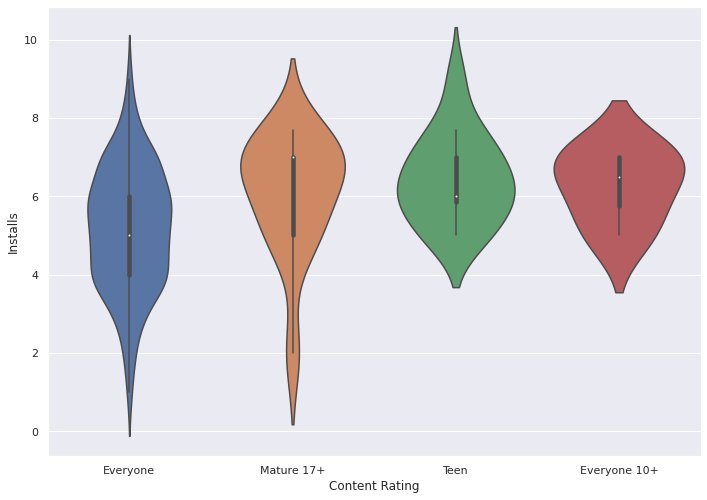

In [19]:
sns.violinplot(x="Content Rating", y="Installs", data=sub_set)
plt.show()  

<div dir=rtl>
<h4>
ראשית, ניתן לראות כי עבור הקטגורויות Teen, Everyone +10 ו - Mature +17, הממוצעים קרובים (בין 6 ל - 7) וההתפלגות מרוכזת באותו אופן מסביב לממוצא, פרט לקטגוריה Mature +17 שבה נראה כי יש מספר ערכים חריגים בודדים ה"מושכים" את ההתפלגות כלפי מטה.
עבור הקטגוריה Everyone נראה כי הממוצע יחסית נמוך משאר הקטגוריות וכי ההתפלגות פחות מרוכזת סביבו. נשים לב כי תוצאה זו יכולה לנבוע מגדלי המדגם השונים שכן, כפי שהראנו קודם, מרבית האפליקציות במדגם הגיעו מקטגוריה זו.
</h4>
</div>

<div dir=rtl>
<h4>
4. נבצע ריגרסיה לינארית ונמצא את ערכי האומדן לבטא:
</h4>
</div>

In [20]:
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()

reg = linear_model.LinearRegression()
reg.fit(x_vals, sub_set['Installs'].to_numpy())
beta_cova = reg.intercept_ + reg.coef_

con_rat_vals = ln_reg_df['Content Rating'].unique()
print(tabulate([['Effect'] + list(beta_cova)], headers=[' ', 'Bias', 'Rating', 'Reviews'] + list(con_rat_vals)))

           Bias    Rating    Reviews    Everyone     Teen    Everyone 10+    Mature 17+    Adults only 18+
------  -------  --------  ---------  ----------  -------  --------------  ------------  -----------------
Effect  2.47141   3.64796    2.84548     2.84237  2.41025         2.67144       2.69238            2.69238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
ההשפעה של עלייה ביחידה אחת של דירוג האפליקציה על מספר ההורדות היא השפעה של 3.6 יחידות.
השפעה של יחידה אחת במספר הביקרות היא השפעה חיובית של 2.85. 
</br>
השפעת איבר הטייה היא של 2.47 יחידות על מספר ההורדות.
</br>
נראה כי פרט לשוני קטן (של 0.2 יחידות), השפעת דירוג התוכן על מספר ההורדות הוא זהה. מכיוון שלכל אפליקציה יש בדיוק דירוג תוכן אחד, איבר זה דומה לאיבר ההטיה שכן כל אפליקציה מקבלת תוספת דומה למספר ההורדות ללא תלות בדרגת הדירוג ממנה הגיעה.
</h4>
</div>

<div dir=rtl>
<h4>
5. נחשב את טבלת ה - ANOVA, ה - R בריבוע ואת ה - R בריבוע adj:
</h4>
</div>

In [21]:
y = sub_set['Installs'].to_numpy()
y_cova = reg.predict(x_vals)

ssr = sum([(yi - np.mean(y))**2 for yi in y_cova])
sse = sum([x**2 for x in y - y_cova])
sst = sum([(yi - np.mean(y))**2 for yi in y])
p = len(beta_cova) + 1
n = len(y)

list_to_tab = []
list_to_tab.append(['Regression', ssr, p, ssr/(p - 1)])
list_to_tab.append(['Residuals', sse, n - p, sse/(n - p)])
list_to_tab.append(['Total', sst, n - 1, sst/(n - 1)])
print(tabulate(list_to_tab, headers=['Source', '𝑺𝑺', '𝒅𝒇', '𝑴𝑺']))

r_sqwr = ssr/sst
r_sqwr_adj = 1 - ((n - 1)/(n - p))*(1 - r_sqwr)
print()
print('R^2 = ', r_sqwr)
print('R^2_adj = ', r_sqwr_adj)

Source            𝑺𝑺    𝒅𝒇         𝑴𝑺
----------  --------  ----  ---------
Regression  451.044      9  56.3805
Residuals    37.6273   191   0.197002
Total       488.672    199   2.45564

R^2 =  0.9230007889274192
R^2_adj =  0.9197756910814472


<div dir=rtl>
<h4>
נבצע מבחן F:
</h4>
</div>

In [22]:
f = (ssr/(p - 1))/(sse/(n - p))
print('R.R. = ', dist.f.ppf(0.95, p, n - p))

print('F value = ', f)

R.R. =  1.9291629235741017
F value =  286.19311196409353


<div dir=rtl>
<h4>
F > R.R. ולכן נדחה את השערת האפס, כלומר תוצאת המבחן היא שאכן יש סיבה להאמין כי הקשר הלינארי שאנו מניחים מתקיים.
</h4>
</div>

<div dir=rtl>
<h4>
6. נחשב רווח סמך למקדים:
</h4>
</div>

In [23]:
i = 0
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
x_vals = np.array([np.insert(x, 1, 0) for x in x_vals])
c = np.dot(x_vals.T, x_vals)
c = np.linalg.pinv(c)

eps_sigma =  sum([x**2 for x in y - y_cova])/(len(y) - p)

for b in beta_cova:
  print('Confidence Interval For Coefficient Number ', i, ': [', b - dist.norm.ppf(0.95, 0, 1)*eps_sigma*c[i][i], ', ',  b + dist.norm.ppf(0.95, 0, 1)*c[i][i], ']')
  i += 1

Confidence Interval For Coefficient Number  0 : [ 2.4651107222210547 ,  2.5033890074317413 ]
Confidence Interval For Coefficient Number  1 : [ 3.6479610966437144 ,  3.6479610966437144 ]
Confidence Interval For Coefficient Number  2 : [ 2.8447588483981443 ,  2.849144982227141 ]
Confidence Interval For Coefficient Number  3 : [ 2.7358085451872123 ,  3.3833101079861674 ]
Confidence Interval For Coefficient Number  4 : [ 2.275029204236302 ,  3.0966161604748885 ]
Confidence Interval For Coefficient Number  5 : [ 2.470216670666749 ,  3.6928613636679875 ]
Confidence Interval For Coefficient Number  6 : [ 2.5727263824946744 ,  3.299781924690558 ]
Confidence Interval For Coefficient Number  7 : [ 2.69238468972564 ,  2.69238468972564 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


<div dir=rtl>
<h4>
נבצע רגרסיה לינארית עבור כל המדגם:
</h4>
</div>

In [24]:
x_vals_all = ln_reg_df.drop(['Content Rating', 'Installs'], 1).to_numpy()

reg_all = linear_model.LinearRegression()
reg_all.fit(x_vals_all, ln_reg_df['Installs'].to_numpy())
beta_cova_all = reg_all.intercept_ + reg_all.coef_

con_rat_vals = ln_reg_df['Content Rating'].unique()
print(tabulate([['Effect'] + list(beta_cova)], headers=[' ', 'Bias', 'Rating', 'Reviews'] + list(con_rat_vals)))

           Bias    Rating    Reviews    Everyone     Teen    Everyone 10+    Mature 17+    Adults only 18+
------  -------  --------  ---------  ----------  -------  --------------  ------------  -----------------
Effect  2.47141   3.64796    2.84548     2.84237  2.41025         2.67144       2.69238            2.69238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
7. לכל פרמטר נבצע מבחן וואלד כדי לראות אם הוא שונה מ - 0:
</h4>
</div>

In [26]:
i = 0

x_vals_all = ln_reg_df.drop(['Content Rating', 'Installs'], 1).to_numpy()
y_cova_all = reg_all.predict(x_vals_all)

x_vals_all = np.array([np.insert(x, 1, 0) for x in x_vals_all])
c_all = np.dot(x_vals_all.T, x_vals_all)
c_all = np.linalg.pinv(c_all)
y_all = ln_reg_df['Installs'].to_numpy()
eps_sigma_all =  sum([x**2 for x in y_all - y_cova_all])/(len(y_all) - p)


for b in beta_cova_all:
  print()
  print('----------------------------')
  print('H0: beta', i, ' = 0')
  print('H0: beta', i, ' != 0')
  t = b/np.sqrt(eps_sigma_all*c_all[i][i])
  print('The Statistic Is T = ', t)
  if abs(t) <= dist.norm.ppf(0.95, 0, 1):
    print('We Accept H0')
  else:
    print('We Reject H0')  
  print()
  print('----------------------------')  
  i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until



----------------------------
H0: beta 0  = 0
H0: beta 0  != 0
The Statistic Is T =  280.3177642075286
We Reject H0

----------------------------

----------------------------
H0: beta 1  = 0
H0: beta 1  != 0
The Statistic Is T =  nan
We Reject H0

----------------------------

----------------------------
H0: beta 2  = 0
H0: beta 2  != 0
The Statistic Is T =  1039.8267210552253
We Reject H0

----------------------------

----------------------------
H0: beta 3  = 0
H0: beta 3  != 0
The Statistic Is T =  75.00089939936144
We Reject H0

----------------------------

----------------------------
H0: beta 4  = 0
H0: beta 4  != 0
The Statistic Is T =  69.46696190668673
We Reject H0

----------------------------

----------------------------
H0: beta 5  = 0
H0: beta 5  != 0
The Statistic Is T =  64.24302673213165
We Reject H0

----------------------------

----------------------------
H0: beta 6  = 0
H0: beta 6  != 0
The Statistic Is T =  64.94963022162037
We Reject H0

--------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


<div dir=rtl>
<h4>
8. נציג גרף שאריות:
</h4>
</div>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


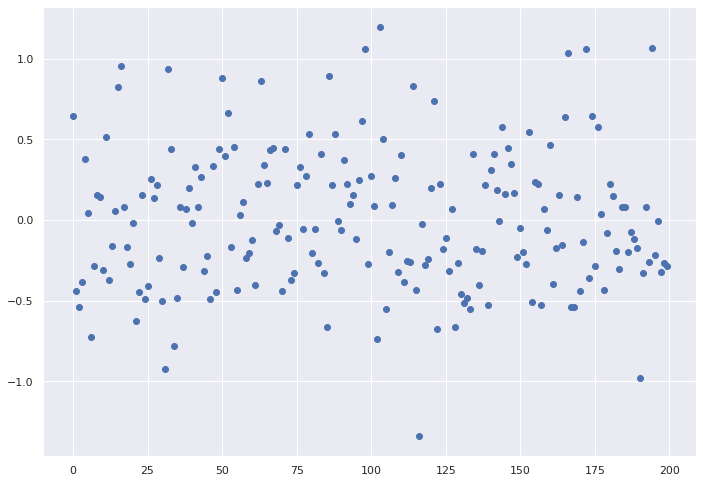

In [27]:
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
y = sub_set['Installs'].to_numpy()
y_cova = reg.predict(x_vals)

plt.scatter(range(len(y)), y_cova - y)

<div dir=rtl>
<h4>
ניתן לראות כי המודל שלנו חסר הטיה (הנחת הלינאריות הגיונית) וכי אפשר להניח שהשונויות קבועות.
</h4>
</div>

<div dir=rtl>
<h4>
9. נדגום מדגם מקרי של 1000 נקודות:
</h4>
</div>

In [28]:
rows = np.random.choice(np.setdiff1d(ln_reg_df.index.values, sub_set.index.values), 1000)
test_set = ln_reg_df.loc[rows]
test_set.head()

,Rating,Reviews,Content Rating,Installs,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated
4010,2.0,1.380211,Everyone,3.00000,1,0,0,0,0,0
6892,4.2,5.392178,Teen,6.00000,0,1,0,0,0,0
10727,4.1,2.346353,Everyone,4.69897,1,0,0,0,0,0
1342,4.5,5.367809,Everyone,6.69897,1,0,0,0,0,0
10147,4.1,2.726727,Everyone,5.00000,1,0,0,0,0,0


<div dir=rtl>
<h4>
נחשב את הפרדיקציה ואת רווחי התחזית על סט המבחן ונמצא את אחוז הלייבלים שנפלו בתוך רווח הסמך:
</h4>
</div>

In [29]:
x_vals = test_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
y = test_set['Installs'].to_numpy()
y_cova = reg.predict(x_vals)
x_vals = np.array([np.insert(x, 1, 0) for x in x_vals])


count = 0

for i in range(len(y)):
  if y_cova[i] - dist.norm.ppf(0.95, 0, 1)*eps_sigma*math.sqrt(1 - x_vals[i].T.dot(c).dot(x_vals[i])) <= y[i] <= \
          y_cova[i] + dist.norm.ppf(0.95, 0, 1)*eps_sigma*math.sqrt(1 - x_vals[i].T.dot(c).dot(x_vals[i])):
    count += 1

print('Percentage Of Hits', 100*count/len(y), '%')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Percentage Of Hits 53.9 %


<div dir=rtl>
<h4>
יצא כי אחוז רווחי הסמך המכילים את הערך האמיתי הוא נמוך מאוד (54 אחוז) וכלל לא קרוב ל - 95%. המסקנה שלו מכך היא שמודל שלנו לא מייצג את הנותונים בצורה טובה כלל.
</h4>
</div>

<div dir=rtl>
<h4>
10. נוסיף למודל איבר אינטרקציה מסדר ראשון:
</h4>
</div>

In [30]:
ln_int = sub_set.copy()
ln_int['x1dotx2'] = sub_set['Reviews'] * sub_set['Rating']
ln_int.head()

,Rating,Reviews,Content Rating,Installs,Everyone,Teen,Everyone 10+,Mature 17+,Adults only 18+,Unrated,x1dotx2
7499,4.1,1.785330,Everyone,3.00000,1,0,0,0,0,0,7.319852
3588,3.7,3.696880,Everyone,6.00000,1,0,0,0,0,0,13.678457
4030,4.2,1.301030,Everyone,3.69897,1,0,0,0,0,0,5.464326
4719,4.2,1.462398,Everyone,3.69897,1,0,0,0,0,0,6.142072
289,4.2,4.667500,Everyone,6.00000,1,0,0,0,0,0,19.603499


<div dir=rtl>
<h4>
נבצע רגרסיה לינארית:
</h4>
</div>

In [31]:
x_vals_int = ln_int.drop(['Content Rating', 'Installs'], 1).to_numpy()

reg_int = linear_model.LinearRegression()
reg_int.fit(x_vals_int, ln_int['Installs'].to_numpy())
beta_cova_int = reg_int.intercept_ + reg_int.coef_

con_rat_vals = ln_reg_df['Content Rating'].unique()
print(tabulate([['Effect'] + list(beta_cova)], headers=[' ', 'Bias', 'Rating', 'Reviews'] + list(con_rat_vals)))

           Bias    Rating    Reviews    Everyone     Teen    Everyone 10+    Mature 17+    Adults only 18+
------  -------  --------  ---------  ----------  -------  --------------  ------------  -----------------
Effect  2.47141   3.64796    2.84548     2.84237  2.41025         2.67144       2.69238            2.69238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
על מנת להשוואת בין המודלים נחשב ציונים למודל:
</h4>
</div>

In [32]:
def AIC(ll,s_size):
  return ll - s_size
def BIC(ll,s_size,n):
  return ll - (s_size*np.log(n))/2

In [33]:
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()

y1 = sub_set['Installs']
y1_cova = reg.predict(x_vals)
n = len(y1)
erorr = y1 - y1_cova
sigma = np.std(erorr)
f1 = np.log(((0.5*math.pi*(sigma**2))**(n/2))*np.exp(-1*(np.dot(erorr.T, erorr)))/2*(sigma**2))

y2 = ln_int['Installs']
y2_cova = reg_int.predict(x_vals_int)
erorr = y1 - y1_cova
sigma = np.std(erorr)
f2 = np.log(((0.5*math.pi*(sigma**2))**(n/2))*np.exp(-1*(np.dot(erorr.T, erorr)))/2*(sigma**2))

print('AIC For The First Model: ', f1 - len(beta_cova))
print('AIC For The Second Model: ', f2 - len(beta_cova_int))

print('BIC For The First Model: ', f1 - (len(beta_cova)*np.log(n))/2)
print('BIC For The Second Model: ', f2 - (len(beta_cova_int)*np.log(n))/2)

AIC For The First Model:  -169.89146388773827
AIC For The Second Model:  -170.89146388773827
BIC For The First Model:  -183.0847333539304
BIC For The Second Model:  -185.73389203720444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<div dir=rtl>
<h4>
קיבלנו כי גם לפי מדד ה - AIC וגם לפי מדד ה - BIC לא ניתן לקבוע מי הוא המודל הטוב יותר וזאת מכיוון שהערכים יצאו מאוד קרובים.
</h4>
</div>


<div dir=rtl><h1>
רגרסיה לוגסטית
</h1>
<h3>
1. שאלת החקר היינה האם כמות ההורדות,תגובות ,דירוג האפקלציה והאם האפלקציה חינמית משפיעים על האם האפלקציה עודכנה לאחרונה
<br>
בדומה לחלק הראשון נבצע טרנספומציות על סט הנתונים. כאן בנוסף, נמיר את עמודת הגודל לfloat ונמיר ממגה בייט לקילו בייט ונוריד את הרשומות בהן הגודל אינו קבוע. 
</div>


In [34]:
df = pd.read_csv("/content/googleplaystore.csv")
df = df.drop(df[(df.Type !='Paid') & (df.Type !='Free')].index)
df = df.dropna()
isFree_Data = df.Type.apply(lambda x: True if x=='Free' else False)
df.insert(7,'IsFree',isFree_Data)
df = df.drop('Type', 1)
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
Last_Updated=pd.to_datetime(df['Last Updated'], format='%B %d %Y')
df = df.drop('Last Updated',axis=1)
df.insert(9,'Last Updated',Last_Updated)
recntly = df['Last Updated'].map(lambda x: True if x > datetime.date(2018,6,1) else False)
df.insert(9,'Recntly Updated',recntly)
df['Installs'] = df['Installs'].map(lambda s: int(s[:-1].replace(',', '')))
df = df[df['Size'] !='Varies with device']
df['Size'] = df['Size'].map(lambda x: float(x.split('k')[0]) if 'k' in x else float(x.split('M')[0])*1024 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<div dir=rtl>
בשל סיבות שהודגמו בחלק הראשון נבצע לוג10 על הורדות ותגובות, ובנוסף נהפוך את עודכן לאחרונה והאם האפלקציה חינמית לערכים בינארים.

In [35]:
ln_reg_df = df
ln_reg_df['Installs'] = ln_reg_df['Installs'].map(lambda x: np.log10(int(x)))
ln_reg_df['Reviews'] = ln_reg_df['Reviews'].map(lambda x: np.log10(int(x)))
ln_reg_df['Recntly Updated'] = ln_reg_df['Recntly Updated'].map(lambda x: 1 if x else 0) 
ln_reg_df['IsFree'] = ln_reg_df['IsFree'].map(lambda x: 1 if x else 0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<div dir=rtl><h3>
2. כעת נבחר מדגם בגודל 200 להמשך העבודה:

In [36]:
sample = ln_reg_df.sample(n=200,random_state=7).reset_index(drop = True)
sample.head()

,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Recntly Updated,Last Updated,Genres,Current Ver,Android Ver
0,learn c in hindi,FAMILY,4.3,2.037426,2764.8,3.69897,1,0,Everyone,0,2017-06-24,Education,4.1,4.0 and up
1,Dr. Truck Driver : Real Truck Simulator 3D,FAMILY,4.1,3.211121,98304.0,5.00000,1,0,Everyone 10+,1,2018-07-05,Simulation,1.8,4.1 and up
2,U-Craft Mobile,FAMILY,4.2,4.057057,30720.0,5.00000,1,0,Everyone,0,2017-09-11,Strategy,1.0.14,4.0.3 and up
3,Resume Builder - Curriculum Vitae & Resume Maker,BUSINESS,4.0,1.079181,8294.4,3.69897,1,0,Everyone,1,2018-06-07,Business,1.9,4.0.3 and up
4,Rider,GAME,4.5,5.816286,73728.0,7.00000,1,0,Teen,0,2017-07-17,Arcade,1.2.1,4.0.3 and up


<div dir=rtl><h3>
3.א. ננתח את Recntly Updated וIsFree שכן אלו המשתנים בהם לא השתמשנו בחלק הראשון.

In [37]:
last_Updated = len(sample[sample['Recntly Updated']== True])
not_last_updated = len(sample[sample['Recntly Updated']== False])
per_Updated = str(100*last_Updated/(not_last_updated+last_Updated))+'%'
per_not_Updated = str(100*not_last_updated/(not_last_updated+last_Updated))+'%'

column_names = [' ', 'Recntly Updated',"Didn't Recntly Updated"]
print(tabulate([['Total'] + [last_Updated,not_last_updated],['Percentge'] + [per_Updated,per_not_Updated]],headers=column_names))

           Recntly Updated    Didn't Recntly Updated
---------  -----------------  ------------------------
Total      85                 115
Percentge  42.5%              57.5%


<div dir=rtl><h3>
נשים לב כי ההתפלגויות של האפקלציות שעודכנו לאחרונה ואלו  ושלא קרובות אחת לשנייה 

In [38]:
IsFree = len(sample[sample['IsFree']== True])
Is_not_Free = len(sample[sample['IsFree']== False])
per_Free = str(100*IsFree/(Is_not_Free+IsFree))+'%'
per_not_Free = str(100*Is_not_Free/(Is_not_Free+IsFree))+'%'

column_names = [' ', 'IsFree',"Isn't Free"]
print(tabulate([['Total'] + [IsFree,Is_not_Free],['Percentge'] + [per_Free,per_not_Free]],headers=column_names))

           IsFree    Isn't Free
---------  --------  ------------
Total      186       14
Percentge  93.0%     7.0%


<div dir=rtl><h3>
נשים לב כי ההתפלגות של האפלקציות החינמיות גבוה משמעותית מההתפגלות של האפקלציות הלא חינמיות

In [39]:
sample_expalining= sample[['Rating','Reviews','Installs','IsFree']]
df_recntly = ln_reg_df[ln_reg_df['Recntly Updated'] == 1]
df_no_recntly = ln_reg_df[ln_reg_df['Recntly Updated'] == 0]

<div dir=rtl><h3>
4. 

In [40]:
def comapre_recntly_and_not(column):
  
  plt.xlabel(column)
  plt.ylabel('Count')
  sns.violinplot(x='Recntly Updated',y=column,data = ln_reg_df)
  plt.show()

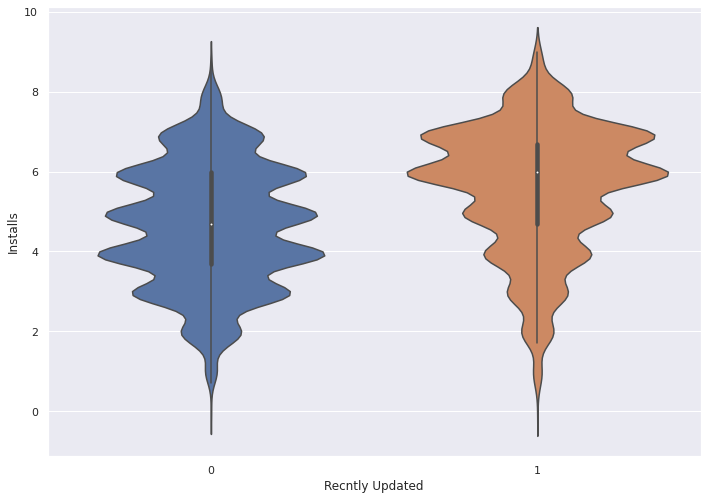

In [41]:
comapre_recntly_and_not('Installs')

<div dir=rtl><h3>
ניתן לראות כי עבור אפלקציות שעודכנו לאחרונה יש יותר אפלקציות בעלות מספר גבוה של הורדות בהשוואה לאלו שלא עודכנו לאחרונה.

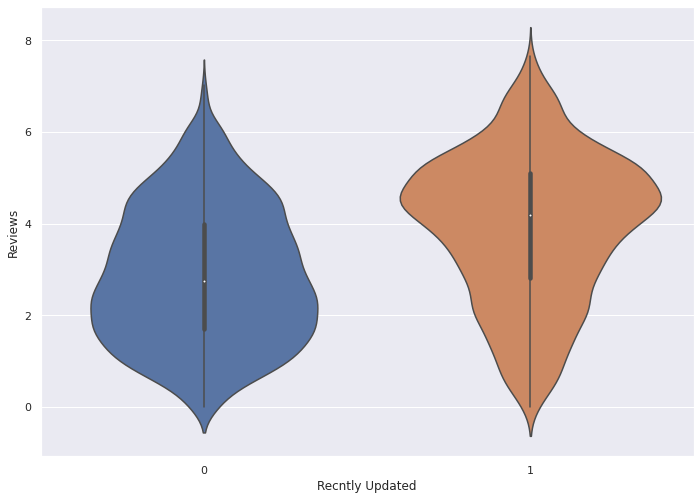

In [42]:
comapre_recntly_and_not('Reviews')

<div dir=rtl><h3>
ניתן לראות כי באופן דומה לאפלקציות שעודכנו לאחרונה יש מספר גדול יותר של אפלקציות בעלות כמות גדולה של תגובות. נשים לב כי תוצאה זו עיקבית עם התוצאה שקיבלנו בחלק הראשון שבו ראינו שיש קשר לינארי ישר בין מספר ההורדות למספר הביקורות. 

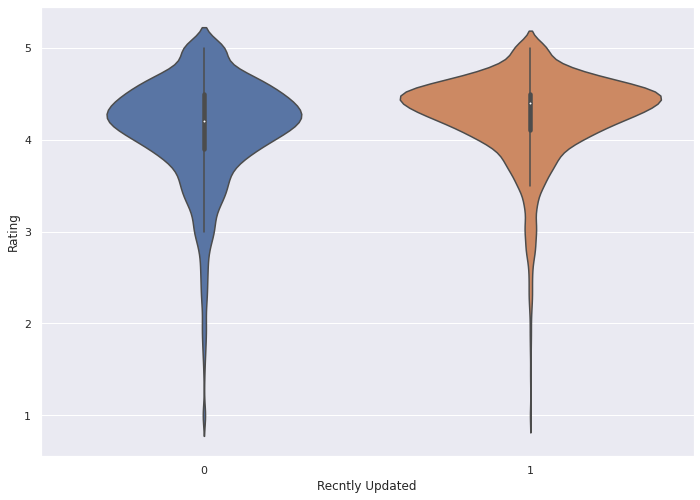

In [43]:
comapre_recntly_and_not('Rating')

<div dir=rtl><h3>
נראה כי עבור אפלקציות שעודכנו לאחרונה יש נטייה לאפלקציות להיות עם דירוג גבוה יותר, אך התצאה אינה חד משמעית כתוצאה מגרף הוויולין.

<div dir=rtl><h3>
בסהכ, מהגרפים שהצגנו ניתן להסיק כי להורדות ולתגובות יש השפעה דומה והיא הגבוהה ביותר.<br>
כעת נבצע רגרסיה לוגסטית ונעריך את b^:

In [44]:
model_sample = LogisticRegression(solver='liblinear').fit(sample_expalining, sample['Recntly Updated'])

In [45]:
beta_estimation_sample = model_sample.coef_
print(beta_estimation_sample[0])

[ 0.04167591  0.80349835 -0.49129332  0.45327263]


<div dir=rtl>
<h3>
נגדיר את β^ = (β1,..,β4) וX =(x1,..x4). נסתכל על שינוי ביחידה באחד מהמשתנים בווקטור X (משתנה 1 לדוגמא) ונסמן X_1 = (x1+1,x2,x3,x4).המודל מוגדר על ידי π(β * X)  ונגדיר את השינוי  ביחידה באחד המשתנים כπi(β* X_i)
<br>
כעת נסתכל על יחס הלוגים:
<br>
log((π1/1-π1)/(π/1-π)) = log(π1/1-π1) - log(π/1-π) = β*X+β1 - β*X = β1
ולכן יהיה שינוי e^β1 = e^0.0416=1.042

נשים לב כי עבור כל i מתקיים שהשינוי הוא e^βi ולכן סהכ עבור הבאים:

השינוי עבור x2 הוא e^β2 = e^0.803= 2.23

השינוי עבור x3 הוא e^β3 = e^-0.491= 0.612

השינוי עבור x4 הוא e^β4 = e^0.453= 1.57

<h3>


</div>


In [46]:
def pi(beta_est,i):
  e = np.exp(np.dot(beta_est,sample_expalining.loc[i]))
  return e[0]/(1+e[0])
def sigmoid(z):
    predict_proba = 1 / (1 + np.exp(-z))
    return predict_proba

<div dir=rtl>
<h3>
5. על מנת למצוא את רווחי הסמך עלינו לחשב את השונות של האומד ועל כן נחשבה על ידי   VAR(β^) = (XtVX)^-1 כאשר:



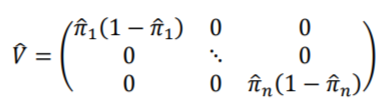

In [47]:
val = [pi(beta_estimation_sample,i)*(1-pi(beta_estimation_sample,i)) for i in range(200)]
V = np.diag(val)

In [48]:
corr_beta = fractional_matrix_power(np.dot(np.dot(np.transpose(sample_expalining),V),sample_expalining),-1) 
vars = [corr_beta[i][i] for i in range(corr_beta.shape[0])]
for i in range(4):
  print('The varience of beta-'+ str(i) + ' is '+ str(vars[i]))

The varience of beta-0 is 0.021465819634470758
The varience of beta-1 is 0.08544671401285384
The varience of beta-2 is 0.08246463393263657
The varience of beta-3 is 0.3657375208479603


<div dir=rtl>
<h3>
כעת נחשב את רווחי הסמך כפי שנלמד בכיתה:
<h3>


</div>


In [49]:
list_ranges= []
for i in range(corr_beta.shape[0]):
  print('Confidence Interval For Coefficient Number ', i, ': [', beta_estimation_sample[0][i] - 2*corr_beta[i][i], ', ',  beta_estimation_sample[0][i] + 2*corr_beta[i][i], ']')
  list_ranges.append([beta_estimation_sample[0][i] - 2*corr_beta[i][i],  beta_estimation_sample[0][i] + 2*corr_beta[i][i]])

Confidence Interval For Coefficient Number  0 : [ -0.001255728077461167 ,  0.08460755046042187 ]
Confidence Interval For Coefficient Number  1 : [ 0.6326049247926064 ,  0.9743917808440219 ]
Confidence Interval For Coefficient Number  2 : [ -0.6562225917786132 ,  -0.32636405604806684 ]
Confidence Interval For Coefficient Number  3 : [ -0.27820241413825264 ,  1.1847476692535885 ]


<div dir=rtl>
<h3>
 כעת נבצע רגרסיה לוגיסטית על המדגם המקורי:
<h3>


</div>


In [50]:
model = LogisticRegression(solver='liblinear').fit(ln_reg_df[['Rating','Reviews','Installs','IsFree']], ln_reg_df['Recntly Updated'])
beta_estimation = model.coef_[0]

<div dir=rtl>
<h3>
כעת נבדוק האם רווחי הסמך שהתקבלו מהמדגם הקטן מכילים את האומדים עבור כל המדגם:<h3>


</div>


In [51]:
explainers = ['Rating','Reviews','Installs','IsFree']
for i in range(len(beta_estimation)):
  if list_ranges[i][0]<= beta_estimation[i] and (beta_estimation[i] <= list_ranges[i][1]):
    str_in = ''
  else:
    str_in = "n't"
  print('Estimator for '+ explainers[i] + ' is'+str_in+' in the confidence interval')

Estimator for Rating isn't in the confidence interval
Estimator for Reviews isn't in the confidence interval
Estimator for Installs isn't in the confidence interval
Estimator for IsFree is in the confidence interval


<div dir=rtl>
<h3>
6. נוסיף את האינטרקציות מסדר ראשון:

</div>


In [52]:
columns = list(sample_expalining.columns)
sample_expalining_added_var = sample_expalining.copy()
for i,name in enumerate(columns):
  for j in range(i+1,len(columns)):
    cur = 'z_' + name +'_'+columns[j]
    sample_expalining_added_var[cur] = sample_expalining_added_var[name] * sample_expalining_added_var[columns[j]]

<div dir=rtl>
<h3>
נבצע רגרסיה לוגסטית על המדגם החדש:
</div>


In [53]:
model_added_var = LogisticRegression(solver='liblinear').fit(sample_expalining_added_var, sample['Recntly Updated'])
beta_estimation_added_var = model_added_var.coef_[0]

In [54]:
def log_likeihood(train,beta):
  log_likeihood = 0
  for index,x in train.iterrows():
    log_odds = beta @ x
    y_pred_proba = sigmoid(log_odds)
    y_actual = sample['Recntly Updated'].loc[index]
    log_likeihood += y_actual*np.log(y_pred_proba) + (1-y_actual)*np.log(1-y_pred_proba)
  return log_likeihood
reduced_ll = log_likeihood(sample_expalining,beta_estimation_sample)


<div dir=rtl>
<h3>
נשווה בין המודלים כאשר המודל המלא הוא המודל הכולל את האינטרקציות:

</div>


In [55]:
full_ll = log_likeihood(sample_expalining_added_var,beta_estimation_added_var)
reduced_ll = log_likeihood(sample_expalining,beta_estimation_sample)
LR_statistic = -2*(reduced_ll-full_ll)
p_val = dist.chi2.sf(LR_statistic, 6)
p_val[0]

4.142064303126668e-09

<div dir=rtl>
<h3>
הערך קטן מ0.05 ולכן נדחה את השערת האפס. ולכן המודל המלא לומד את הדטא בצורה טובה יותר ועל כן נבחר אותו.
<br>
כעת נשווה בין המודלים על ידי שימוש במדד AIC
</div>


In [56]:
AIC_full = AIC(full_ll,10)
AIC_reuced = AIC(reduced_ll,4)

In [57]:
(AIC_full - AIC_reuced)[0]

19.137098518952342

<div dir=rtl>
<h3>
ולכן AIC של המודל המלא גדול יותר ועל כן בבחירה על סמך הממד נבחר במודל המלא המכיל את המשתנים הנוספים.
</div>

<div dir=rtl>
<h3>
7.

</div>


In [58]:
all_explainers = ['Rating','Reviews','Installs','IsFree','Size']


all_explainers_added_var = all_explainers.copy()
sample_all_expalining = sample[['Rating','Reviews','Installs','IsFree','Size']]
sample_all_expalining_added_var = sample_all_expalining.copy()
i = 0
for i,name in enumerate(all_explainers):
    for j in range(i+1,len(all_explainers)):
      cur = 'z_' + name +'_'+all_explainers[j]
      all_explainers_added_var.append(cur)
      sample_all_expalining_added_var.insert(loc = 5+i ,column=cur, value=sample_all_expalining_added_var[name] *sample_all_expalining_added_var[all_explainers[j]])
      i+=1
sample_all_expalining_added_var['Recntly Updated'] = sample['Recntly Updated']


In [59]:
import sys

def forward(sample,all_explainers,measuring):
  max = -sys.float_info.max
  attributes = []

  for i in range(len(all_explainers)):
    cur_max = max
    max_id = -1
    for k in range(len(all_explainers)):
      attributes.append(all_explainers[k])
      sample_cur = sample[sample.columns.intersection(attributes)]
      model = LogisticRegression(solver='liblinear').fit(sample_cur, sample['Recntly Updated'])
      cur_likeihood= log_likeihood(sample_cur,model.coef_[0])
      if measuring == AIC:
        cur_measuring = measuring(cur_likeihood,len(attributes))
      else:
        cur_measuring = measuring(cur_likeihood,len(attributes),sample_cur.shape[0])
      if cur_measuring > cur_max:
        cur_max = cur_measuring
        max_id = k
      attributes.remove(all_explainers[k])
    if cur_max == max:
      return attributes
    else:
      max = cur_max
      attributes.append(all_explainers[max_id])
      del all_explainers[max_id]

In [60]:
def backward(sample,all_explainers,measuring):
  attributes = all_explainers.copy()
  sample_cur = sample[sample.columns.intersection(attributes)]
  model = LogisticRegression(solver='liblinear').fit(sample_cur, sample['Recntly Updated'])
  cur_likeihood= log_likeihood(sample_cur,model.coef_[0])
  if measuring == AIC:
      min = measuring(cur_likeihood,len(attributes))
  else:
      min = measuring(cur_likeihood,len(attributes),sample_cur.shape[0])
  for i in range(len(all_explainers)):
    cur_max = min
    max_id = -1
    for k in range(len(all_explainers)):
      attributes.remove(all_explainers[k])
      sample_cur = sample[sample.columns.intersection(attributes)]
      model = LogisticRegression(solver='liblinear').fit(sample_cur, sample['Recntly Updated'])
      cur_likeihood= log_likeihood(sample_cur,model.coef_[0])
      if measuring == AIC:
        cur_measuring = measuring(cur_likeihood,len(attributes))
      else:
        cur_measuring = measuring(cur_likeihood,len(attributes),sample_cur.shape[0])
      if cur_measuring > cur_max:
        cur_max = cur_measuring
        max_id = k
      attributes.append(all_explainers[k])
    if cur_max == min:
      return attributes
    else:
      min = cur_max
      attributes.remove(all_explainers[max_id])
      del all_explainers[max_id]


In [61]:
print(forward(sample_all_expalining_added_var,all_explainers_added_var.copy(),AIC))

['z_Reviews_Size', 'z_Rating_Installs', 'z_Reviews_Installs', 'z_Rating_Size', 'z_Rating_Reviews']


In [62]:
print(backward(sample_all_expalining_added_var,all_explainers_added_var.copy(),AIC))


['Rating', 'z_Rating_Reviews', 'z_Rating_Installs', 'z_Rating_Size', 'z_Reviews_Size', 'z_IsFree_Size']


<div dir=rtl>
<h3>
יצאנו תוצאות שונות בין שתי השיטות, כאשר שבשיטות backward יש יותר אטריביוטים מסבירים.
</div>


In [63]:
print(forward(sample_all_expalining_added_var,all_explainers_added_var.copy(),BIC))

['z_Reviews_Size', 'z_Rating_Installs', 'z_Reviews_Installs', 'z_Rating_Size']


In [64]:
print(backward(sample_all_expalining_added_var,all_explainers_added_var.copy(),BIC))

['z_Rating_Reviews', 'z_Rating_Installs', 'z_IsFree_Size']


<div dir=rtl>
<h3>
יצאו תוצאות שונות, עבור foward אטריביוט אחד ירד.כי BIC "מעניש" חזק יותר כשיש יותר אטריבוטים.עבור backward ירדו 3 אטריביוטים גם בשל העונש החזק יותר של BIC לאטריביוטים ביחס לAIC.
</div>
